# 2章 パーセプトロン


## 2.1 パーセプトロンとは

xは入力信号、yは出力信号、wは重みを表す。  
ニューロンの発火する限界値を閾値(θ)とする。

$$
x
= \begin{cases}
 & \ 0 \; (w_{1}x_{1} + w_{1}x_{2} \leq \theta) \\
 & \ 1 \; (w_{1}x_{1} + w_{1}x_{2} > \theta)
\end{cases}
$$


## 2.2 単純な論理回路

### 2.2.1 ANDゲート
### 2.2.1 NANDゲートとORゲート

ORゲートについては一例として以下のように表せる。

$$
(w_{1},w_{1},\theta) = (0.5,0.5,0.3)
$$

ANDもNANDもORも同じモデル(式)でパラメータを変更するだけで表現出来る。

ここでは人間がパラメータを考えたが、機械学習ではパラメータの値を決める作業をコンピュータに自動で行わせる。学習=適切なパラメータを決める作業。


## 2.3 パーセプトロンの実装

### 2.3.1 簡単な実装


In [3]:
# ANDの実装
def func_AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    
print(func_AND(0, 0))
print(func_AND(1, 0))
print(func_AND(0, 1))
print(func_AND(1, 1))

0
0
0
1


### 2.3.2 重みとバイアスの導入

θを-bとして式変形を行なう。bはバイアス。

$$
x
= \begin{cases}
 & \ 0 \; (b + w_{1}x_{1} + w_{1}x_{2} \leq 0) \\
 & \ 1 \; (b + w_{1}x_{1} + w_{1}x_{2} > 0)
\end{cases}
$$

In [4]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b)

[ 0.   0.5]
0.5
-0.2


### 2.3.3 重みとバイアスによる実装
以下では-θをバイアスbと命名した。  
文脈によっては重みもバイアスも含めてパラメータを「重み」と呼ぶ場合がある。


In [5]:
# ANDゲートを実装
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [6]:
# NANDゲートを実装
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 重みとバイアスだけがANDと違う
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
# ORゲートを実装
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 重みとバイアスだけがANDと違う
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.4 パーセプトロンの限界

### 2.4.1 XORゲート
排他的論理和の場合、これまでのパーセプトロンでは実装できない。

ORゲートについて考える。
重みパラメータは$(b,w_{1},w_{2})=(-0.5,1.0,1.0)$の場合、パーセプトロンは以下式となる。
$$
x
= \begin{cases}
 & \ 0 \; (-0.5 + x_{1} + x_{2} \leq 0) \\
 & \ 1 \; (-0.5 + x_{1} + x_{2} > 0)
\end{cases}
$$

パーセプトロンの発火有無であるyの値は直線によって0か1の境界を表すことができる。(グラフ中赤直線)


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


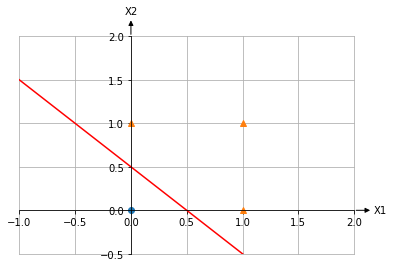

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# グラフx軸、y軸の表示
fig, ax = plt.subplots()
#-- Set axis spines at 0
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

#-- Decorate the spins
arrow_length = 20 # In points

# X-axis arrow
ax.annotate('X1', xy=(1, 0), xycoords=('axes fraction', 'data'), 
            xytext=(arrow_length, 0), textcoords='offset points',
            ha='left', va='center',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
ax.annotate('X2', xy=(0, 1), xycoords=('data', 'axes fraction'), 
            xytext=(0, arrow_length), textcoords='offset points',
            ha='center', va='bottom',
            arrowprops=dict(arrowstyle='<|-', fc='black'))

#-- Plot
ax.axis([-1, 2, -0.5, 2])
ax.grid()


# y=0となる組み合わせ
x1_circle = [0]
x2_circle = [0]

# y=1となる組み合わせ
x1_triangle = [0, 1, 1]
x2_triangle = [1, 0, 1]

# yにおける0と1が求められるの領域
x1 = np.linspace(-2,3,4)
x2 = 0.5 - x1

# プロット
plt.plot(x1_circle, x2_circle, 'o')
plt.plot(x1_triangle, x2_triangle, '^')
plt.plot(x1, x2, 'r-')


plt.show()

### 2.4.2 線形と非線形
ORゲートは直線によってyの境界を表すことができた。これは線形な領域と言う。

一方XORゲートの場合は以下のようにプロットされる。直線によって境界を表すことができないため、曲線で領域を区切る必要がある。これを非線形な領域と言う。


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


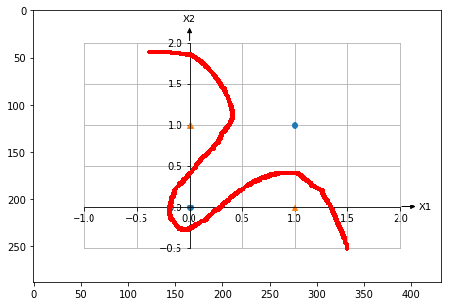

In [9]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('../docs/XOR.png')
plt.figure(figsize=(8,5))
plt.imshow(img)

plt.show()

## 2.5 多層パーセプトロン

パーセプトロンではXORゲートは表現できなかった。
しかし、パーセプトロンを多層に重ねることによって表現可能になる。

### 2.5.1 既存ゲートの組み合わせ
XORはゲートを重ねることによって求めることができる。  
XOR = AND( NAND(x1,x2), OR(x1,x2) )


In [10]:
# 2.5.2 XORゲートの実装

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(1, 1))

0
1
1
0


XORは2層のパーセプトロンで表現できた。(文献によっては3層とも呼ぶ場合がある。)
層を重ねたパーセプトロンは多層パーセプトロン(multi-layered perceptron)と呼ばれる。

ネットワーク図は以下のようになる。
左から第0層、第1層、第2層となる。

/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


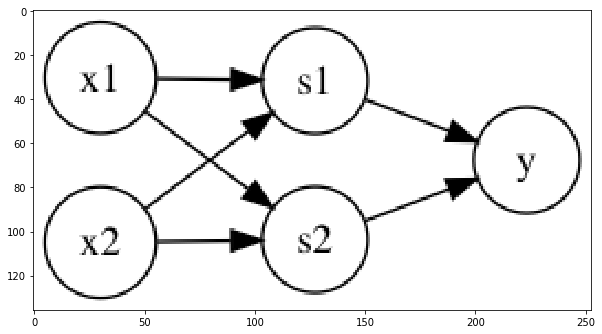

In [27]:
from graphviz import Digraph

f = Digraph(format="png")
f.attr(rankdir='LR', size='8,5')

f.attr('node', shape='circle')
f.edge('x1', 's1')
f.edge('x1', 's2')
f.edge('x2', 's1')
f.edge('x2', 's2')
f.edge('s1', 'y')
f.edge('s2', 'y')

f.render("../docs/XOR_Perceptron")

img = imread('../docs/XOR_Perceptron.png')
plt.figure(figsize=(10,8))
plt.imshow(img)

plt.show()

## 2.6 NANDからコンピュータへ

割愛